In [11]:
# Data Processing
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [12]:
df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 3/Naive_Bayes/Naive_Bayes_Data.csv')
#drop tournament column
df = df.drop(columns=['tournament'])
df.head()

,rank_category,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4
0,2,miraidon,choice specs,hadron engine,fairy,electro-drift,draco-meteor,dazzling-gleam,volt-switch
1,2,ogerpon,hearthflame mask,mold breaker,fire,spiky-shield,ivy-cudgel,wood-hammer,follow-me
2,2,urshifu,focus sash,unseen fist,water,detect,surging-strikes,close-combat,aqua-jet
3,2,iron-hands,assault vest,quark drive,bug,drain-punch,wild-charge,fake-out,low-kick
4,2,whimsicott,covert cloak,prankster,dark,moonblast,encore,light-screen,tailwind


In [13]:
# Select features and target variable
features = ['pokemon', 'item', 'ability', 'tera type', 'move_1', 'move_2', 'move_3', 'move_4']
target = 'rank_category'

features = df[features]
target = df[target]

# Encode the categorical features
features = features.apply(LabelEncoder().fit_transform)
features

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4
0,80,16,48,4,44,38,32,198
1,84,41,68,6,157,103,226,62
2,130,38,137,18,31,188,26,6
3,58,3,91,0,39,216,56,102
4,135,22,82,1,110,52,114,178
...,...,...,...,...,...,...,...,...
4447,124,38,82,8,10,99,198,131
4448,130,12,137,1,192,25,193,196
4449,117,49,17,16,38,38,129,131
4450,25,80,134,9,190,127,46,131


In [14]:
# Define X (features) and y (target)
X = features
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=106)



In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)
# create a confusion matrix

confusion_matrix(y_test, y_pred)

NameError: name 'y_pred' is not defined

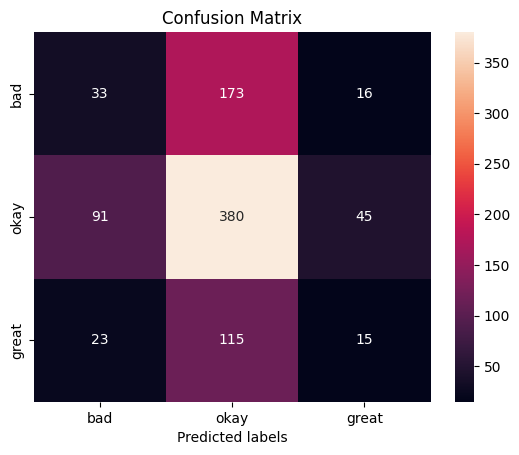

In [ ]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['bad', 'okay', 'great']); ax.yaxis.set_ticklabels(['bad', 'okay', 'great'])

#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 4/Screenshots/RF.png')
plt.show()

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)

    graph = graphviz.Source(dot_data)
    display(graph)


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH